### Importación de datos



In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np

url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url1)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


# 1. Análisis de facturación



In [32]:
# Calcula la facturación por vendedor para la tienda 1
facturacion_tienda1 = tienda1['Precio'].sum()

# Calcula la facturación por vendedor para la tienda 2
facturacion_tienda2 = tienda2['Precio'].sum()

# Calcular la facturación por vendedor para la tienda 3
facturacion_tienda3 = tienda3['Precio'].sum()

# Calcular la facturación por vendedor para la tienda 4
facturacion_tienda4 = tienda4['Precio'].sum()

In [7]:
#Verificaion del tipo de variable para el grafico
print(type(facturacion_tienda1))
print(type(facturacion_tienda2))
print(type(facturacion_tienda3))
print(type(facturacion_tienda4))

<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>
<class 'numpy.float64'>


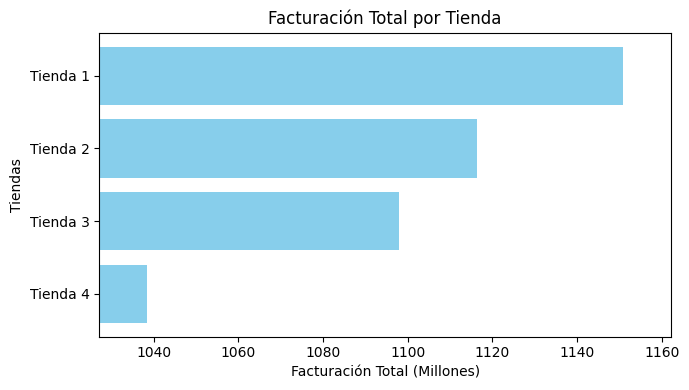

In [20]:
# Datos de facturación y nombres de tiendas
nombres_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
facturaciones = [facturacion_tienda1, facturacion_tienda2, facturacion_tienda3, facturacion_tienda4]

# Convierte facturaciones a millones
facturaciones_en_millones = [f / 1000000 for f in facturaciones]

# Crea el gráfico de barras horizontales
plt.figure(figsize=(7, 4))
plt.barh(nombres_tiendas, facturaciones_en_millones, color='skyblue')
plt.xlabel('Facturación Total (Millones)')
plt.ylabel('Tiendas')
plt.title('Facturación Total por Tienda')
plt.gca().invert_yaxis()

# Personaliza las etiquetas del eje x
def millones(x, pos):
    'Formatea el tick como entero'
    return f'{int(x)}'

plt.ticklabel_format(style='plain', axis='x') # Asegura que no haya notación científica
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(millones))

# Establecer los límites del eje x para que el cero represente 1000 millones
min_facturacion_millones = min(facturaciones_en_millones)
max_facturacion_millones = max(facturaciones_en_millones)

# Calcular un rango adecuado basado en los datos en millones
rango = max_facturacion_millones - min_facturacion_millones
padding = rango * 0.1  # Un pequeño espacio alrededor de los datos

plt.xlim(min_facturacion_millones - padding, max_facturacion_millones + padding)

plt.tight_layout()
plt.show()

Por lo tanto en la categoría de facturación la *tienda 4* es la que menos genera, pero pueden haber muchos factores para que esto ocurra, hay que analiza el resto de factores para saber si en realidad es una tienda rentable de mantener o no.

# 2. Ventas por categoría

In [30]:
ventas_categoria_t1 = tienda1.groupby('Categoría del Producto')['Precio'].sum()
ventas_categoria_t2 = tienda2.groupby('Categoría del Producto')['Precio'].sum()
ventas_categoria_t3 = tienda3.groupby('Categoría del Producto')['Precio'].sum()
ventas_categoria_t4 = tienda4.groupby('Categoría del Producto')['Precio'].sum()

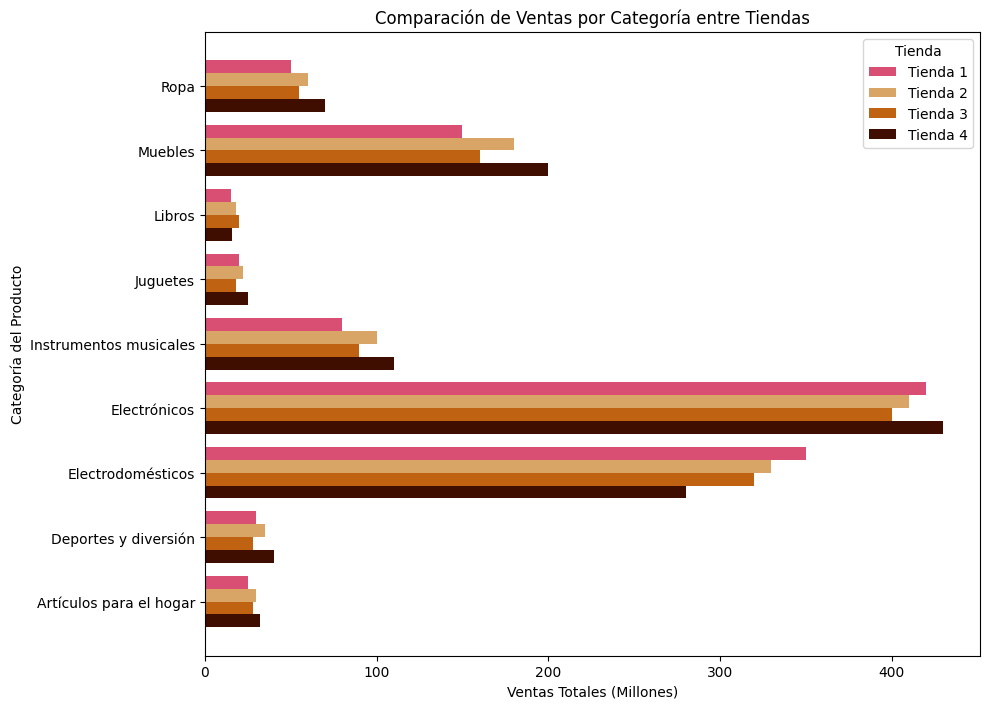

In [57]:
# 1. Identifica todas las categorías únicas
categorias_unicas = pd.concat([ventas_categoria_t1, ventas_categoria_t2, ventas_categoria_t3, 
                               ventas_categoria_t4]).index.unique().sort_values(ascending=False)

# 2. Crea un DataFrame para facilitar la graficación
df_comparacion_ventas = pd.DataFrame({
    'Tienda 1': ventas_categoria_t1.reindex(categorias_unicas).fillna(0),
    'Tienda 2': ventas_categoria_t2.reindex(categorias_unicas).fillna(0),
    'Tienda 3': ventas_categoria_t3.reindex(categorias_unicas).fillna(0),
    'Tienda 4': ventas_categoria_t4.reindex(categorias_unicas).fillna(0)
})

# **Ordenar el DataFrame**
orden_deseado_tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']

# Define los colores para cada tienda
colores = ['#D94E73', '#D9A566', '#BF6211', '#400D01'] # rosado, Naranja, Verde, Rojo (colores más agradables)
# Puedes usar cualquier otro código de color (hex, RGB, nombres de colores de matplotlib)

# Ancho de las barras
ancho_barra = 0.2
posiciones = np.arange(len(categorias_unicas))

fig, ax = plt.subplots(figsize=(10, len(categorias_unicas) * 0.8))

for i, tienda in enumerate(orden_deseado_tiendas):
    ax.barh(posiciones + i * ancho_barra, df_comparacion_ventas[tienda] / 1000000,
            ancho_barra, label=tienda, color=colores[i])

ax.set_yticks(posiciones + (len(orden_deseado_tiendas) - 1) / 2 * ancho_barra)
ax.set_yticklabels(categorias_unicas)
ax.invert_yaxis()
ax.set_xlabel('Ventas Totales (Millones)')
ax.set_ylabel('Categoría del Producto')
ax.set_title('Comparación de Ventas por Categoría entre Tiendas')
ax.legend(title='Tienda')
ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, pos: f'{int(x)}'))
plt.tight_layout()
plt.show()

# 3. Calificación promedio de la tienda


# 4. Productos más y menos vendidos

# 5. Envío promedio por tienda